### INFO8145_Diagnostic Analysis_Market Basket Analysis

In [113]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [114]:
## import original dataset

raw = pd.read_excel('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/CheckOutData.xlsx')
raw.head()

,CheckoutID,DayofYear,DayofWeek,ShiftXtabID,TimeArrive,Hour,EmployeeID,AgeRangeID,AgeRange,GenderID,Gender,MorePersons,EconomyBought,EconomyToasted,EconomySalad,EconomyIsLarge,RegularBought,RegularToasted,RegularSalad,RegularIsLarge,DeluxeBought,DeluxeToasted,DeluxeSalad,DeluxeIsLarge,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie,CustSatisfactionID,IsToGo,zLnk,Inactive
0,538641,2022-04-03,1,3,2022-04-03 11:00:00,11,2,6,Senior,3,Male,1,2,False,False,False,1,False,True,False,0,False,False,False,0,1,0,2,0,8,True,1,NaN
1,538642,2022-04-03,1,3,2022-04-03 11:00:52,11,7,4,31 to 50,3,Male,0,1,True,False,True,2,True,False,False,1,False,False,False,2,0,2,3,1,5,True,1,NaN
2,538643,2022-04-03,1,3,2022-04-03 11:01:52,11,2,4,31 to 50,3,Male,0,2,False,True,True,2,True,False,False,1,False,False,False,1,0,4,1,4,4,True,1,NaN
3,538644,2022-04-03,1,3,2022-04-03 11:03:05,11,2,1,00 to 09,3,Male,0,1,True,False,False,0,False,False,False,0,False,False,False,0,1,0,0,0,3,True,1,NaN
4,538645,2022-04-03,1,3,2022-04-03 11:04:07,11,7,3,19 to 30,2,Female,1,2,True,False,True,0,False,False,False,2,True,False,False,1,0,3,3,1,4,True,1,NaN


In [115]:
raw.isnull().sum()

CheckoutID               0
DayofYear                0
DayofWeek                0
ShiftXtabID              0
TimeArrive               0
Hour                     0
EmployeeID               0
AgeRangeID               0
AgeRange                 0
GenderID                 0
Gender                   0
MorePersons              0
EconomyBought            0
EconomyToasted           0
EconomySalad             0
EconomyIsLarge           0
RegularBought            0
RegularToasted           0
RegularSalad             0
RegularIsLarge           0
DeluxeBought             0
DeluxeToasted            0
DeluxeSalad              0
DeluxeIsLarge            0
BottledDrink             0
BottledWater             0
NonBottledDrink          0
Chips                    0
Cookie                   0
CustSatisfactionID       0
IsToGo                   0
zLnk                     0
Inactive              8300
dtype: int64

In [116]:
## check if any unusual space in the titles
raw.columns

Index(['CheckoutID', 'DayofYear', 'DayofWeek', 'ShiftXtabID', 'TimeArrive',
       'Hour', 'EmployeeID', 'AgeRangeID', 'AgeRange', 'GenderID', 'Gender',
       'MorePersons', 'EconomyBought', 'EconomyToasted', 'EconomySalad',
       'EconomyIsLarge', 'RegularBought', 'RegularToasted', 'RegularSalad',
       'RegularIsLarge', 'DeluxeBought', 'DeluxeToasted', 'DeluxeSalad',
       'DeluxeIsLarge', 'BottledDrink', 'BottledWater', 'NonBottledDrink',
       'Chips', 'Cookie', 'CustSatisfactionID', 'IsToGo', 'zLnk', 'Inactive'],
      dtype='object')

In [117]:
## check if any duplicates

raw.duplicated().sum()

0

In [118]:
## Filter the table with my UKP (large size economy salad)


new_doc=raw.loc[(raw['EconomySalad']==True)&(raw['EconomyIsLarge']==True), : ]
new_doc.head()

,CheckoutID,DayofYear,DayofWeek,ShiftXtabID,TimeArrive,Hour,EmployeeID,AgeRangeID,AgeRange,GenderID,Gender,MorePersons,EconomyBought,EconomyToasted,EconomySalad,EconomyIsLarge,RegularBought,RegularToasted,RegularSalad,RegularIsLarge,DeluxeBought,DeluxeToasted,DeluxeSalad,DeluxeIsLarge,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie,CustSatisfactionID,IsToGo,zLnk,Inactive
2,538643,2022-04-03,1,3,2022-04-03 11:01:52,11,2,4,31 to 50,3,Male,0,2,False,True,True,2,True,False,False,1,False,False,False,1,0,4,1,4,4,True,1,NaN
9,538650,2022-04-03,1,3,2022-04-03 11:08:39,11,7,5,51 to 65,2,Female,2,1,False,True,True,1,True,False,True,1,False,False,False,2,0,1,0,3,4,True,1,NaN
44,538685,2022-04-03,1,3,2022-04-03 11:43:38,11,7,6,Senior,2,Female,2,2,False,True,True,1,False,False,True,1,True,False,False,3,0,1,2,2,5,False,1,NaN
59,538700,2022-04-03,1,3,2022-04-03 11:58:38,11,7,6,Senior,2,Female,2,2,False,True,True,1,False,False,True,1,True,False,False,3,0,1,3,1,4,True,1,NaN
61,538702,2022-04-03,1,3,2022-04-03 12:00:06,12,7,1,00 to 09,2,Female,1,2,False,True,True,0,False,False,False,1,True,False,True,2,0,1,2,1,8,True,1,NaN


In [119]:
new_doc.shape

(535, 33)

### Question 4: For your UKP, provide a counts only analysis of Gender and Age Range for each day of the week.

In [120]:
## Create the pivot table of gender and age range for weekday by count for the UKP

piv_age_gender=pd.pivot_table(new_doc, values='EconomySalad', index=['DayofWeek'], columns=['AgeRange', 'Gender'], aggfunc='count')
#piv_age_gender.reset_index(inplace=True)
piv_age_gender

AgeRange  00 to 09              10 to 18              19 to 30                \
Gender      Female Male Unclear   Female Male Unclear   Female  Male Unclear   
DayofWeek                                                                      
1             14.0  7.0     5.0      9.0  1.0     7.0     12.0  10.0     2.0   
2              7.0  4.0     5.0      3.0  NaN     7.0      6.0  11.0     2.0   
3             10.0  5.0     2.0      7.0  4.0     5.0      8.0   3.0     1.0   
4              3.0  5.0     3.0      7.0  3.0     1.0      5.0   4.0     2.0   
5              2.0  1.0     2.0      1.0  NaN     1.0      7.0   3.0     7.0   
6              2.0  4.0     2.0      4.0  2.0     3.0      8.0   4.0     5.0   
7              9.0  1.0     4.0      3.0  4.0     5.0      9.0   3.0     3.0   

AgeRange  31 to 50              51 to 65              Senior               
Gender      Female Male Unclear   Female Male Unclear Female Male Unclear  
DayofWeek                                                                  
1             15.0  7.0     8.0     11.0  4.0     8.0    4.0  3.0     3.0  
2              8.0  NaN     1.0      4.0  3.0     3.0    NaN  1.0     2.0  
3              4.0  8.0     4.0      6.0  2.0     1.0    2.0  2.0     2.0  
4              5.0  NaN     2.0      8.0  7.0     3.0    1.0  1.0     3.0  
5              2.0  4.0     6.0      4.0  NaN     2.0    2.0  2.0     NaN  
6             14.0  6.0     2.0      4.0  3.0     2.0    3.0  3.0     1.0  
7              6.0  7.0     7.0      6.0  4.0     5.0    1.0  4.0     NaN

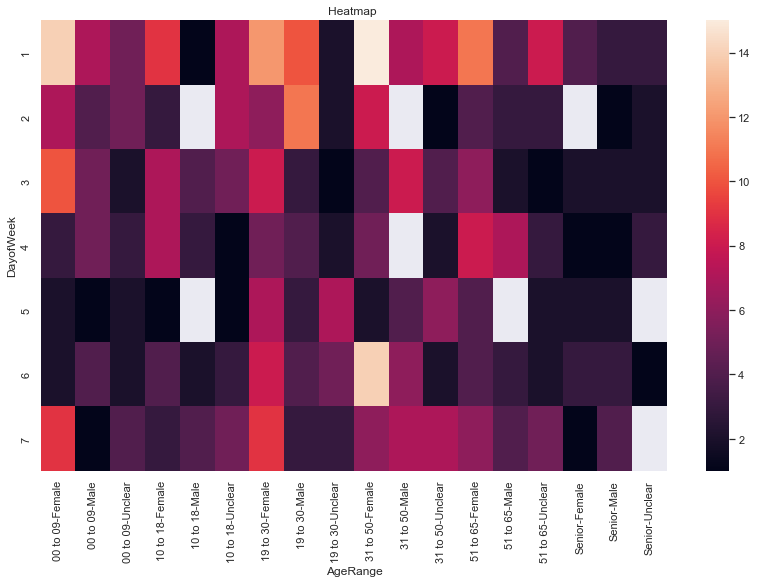

In [121]:

plt.show; ax=sns.heatmap(piv_age_gender);ax.set(xlabel='AgeRange', ylabel='DayofWeek',title='Heatmap ') 
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Question 5-1: For your UKP, provide a counts only analysis of other sandwiches and/or salads purchased to your UKP.

In [122]:
## create the pivot table for counts of transactions of delux salad in each day
pivot_delux_salad_count=pd.pivot_table(new_doc[new_doc['DeluxeSalad']==True] , values=['DeluxeSalad'], index=['DayofYear'], aggfunc='count')
pivot_delux_salad_count.reset_index(inplace=True)
pivot_delux_salad_count

,DayofYear,DeluxeSalad
0,2022-04-03,3
1,2022-04-04,6
2,2022-04-05,4
3,2022-04-06,7
4,2022-04-07,2
5,2022-04-08,8
6,2022-04-09,3
7,2022-04-10,6
8,2022-04-11,2
9,2022-04-12,5


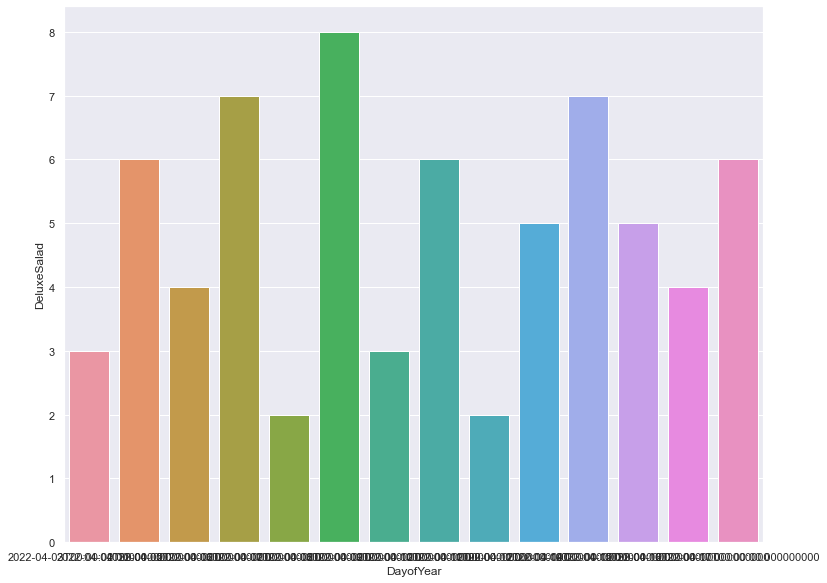

In [123]:
plt.show; ax=sns.barplot( x='DayofYear', y='DeluxeSalad', data=pivot_delux_salad_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [124]:
## create the pivot table for economy salad count

pivot_economy_salad_count=pd.pivot_table(new_doc[new_doc['EconomySalad']==True] , values=['EconomySalad'], index=['DayofYear'], aggfunc='count')
pivot_economy_salad_count.reset_index(inplace=True)
pivot_economy_salad_count

,DayofYear,EconomySalad
0,2022-04-03,40
1,2022-04-04,33
2,2022-04-05,34
3,2022-04-06,32
4,2022-04-07,21
5,2022-04-08,37
6,2022-04-09,40
7,2022-04-10,50
8,2022-04-11,34
9,2022-04-12,42


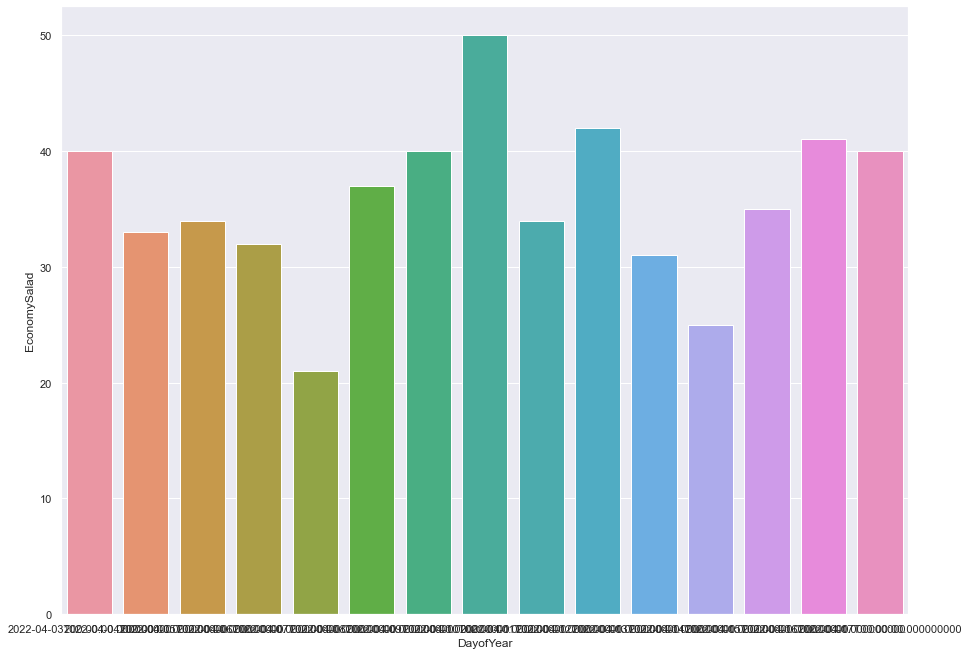

In [125]:
plt.show; ax=sns.barplot( x='DayofYear', y='EconomySalad', data=pivot_economy_salad_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [126]:
## create the pivot table for regular salad

pivot_regular_salad_count=pd.pivot_table(new_doc[new_doc['RegularSalad']==True] , values=['RegularSalad'], index=['DayofYear'], aggfunc='count')
pivot_regular_salad_count.reset_index(inplace=True)
pivot_regular_salad_count

,DayofYear,RegularSalad
0,2022-04-03,5
1,2022-04-04,3
2,2022-04-05,4
3,2022-04-06,4
4,2022-04-07,1
5,2022-04-08,6
6,2022-04-09,5
7,2022-04-10,7
8,2022-04-11,4
9,2022-04-13,5


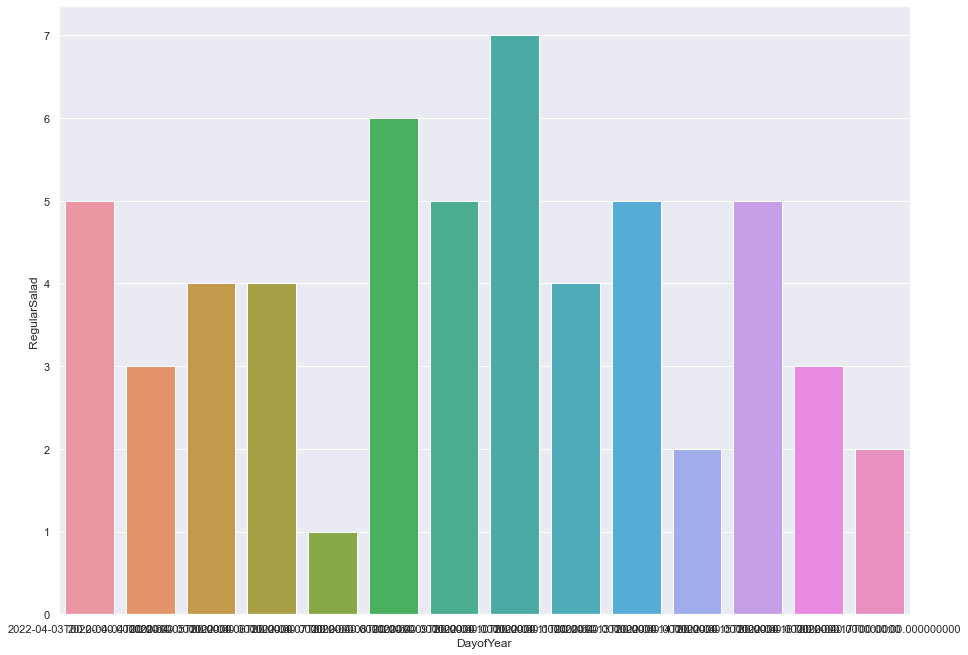

In [127]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='RegularSalad', data=pivot_regular_salad_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [128]:
## Create a table which have all 3 salad transaction counts
salad_count=pd.merge(pivot_regular_salad_count,pivot_economy_salad_count)
salad_count=pd.merge(salad_count,pivot_delux_salad_count)

salad_count

,DayofYear,RegularSalad,EconomySalad,DeluxeSalad
0,2022-04-03,5,40,3
1,2022-04-04,3,33,6
2,2022-04-05,4,34,4
3,2022-04-06,4,32,7
4,2022-04-07,1,21,2
5,2022-04-08,6,37,8
6,2022-04-09,5,40,3
7,2022-04-10,7,50,6
8,2022-04-11,4,34,2
9,2022-04-14,2,25,7


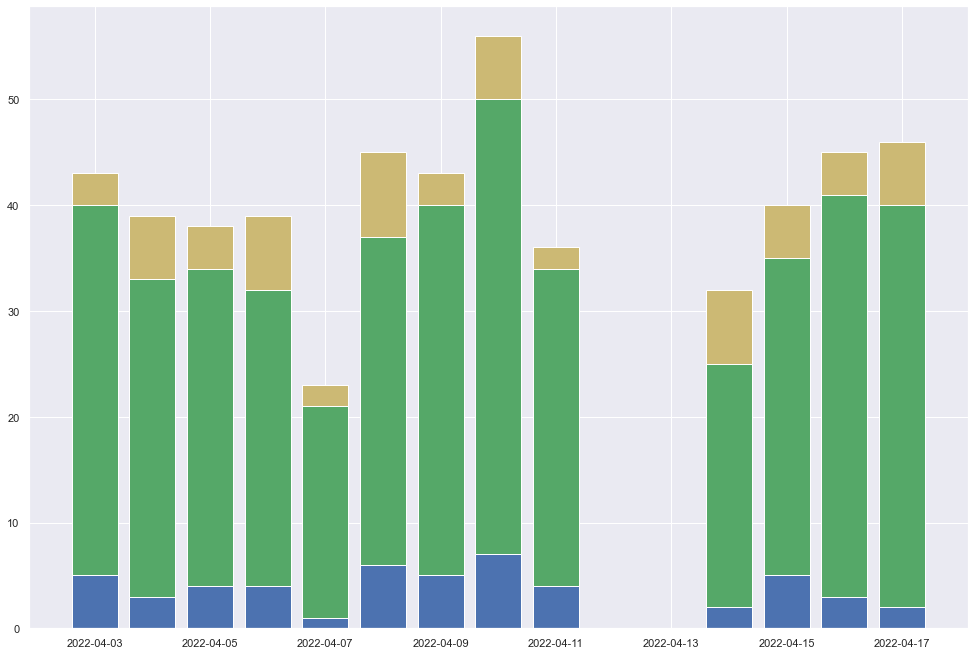

In [129]:
## Visiualize the table
x=salad_count['DayofYear']
y1=salad_count['EconomySalad']
y2=salad_count['RegularSalad']
y3=salad_count['DeluxeSalad']
plt.bar(x, y1, color='g')
plt.bar(x, y2)
plt.bar(x, y3, bottom=y1, color='y')
plt.show()

#salad_count.plot(x='DayofYear',y=['RegularSalad','EconomySalad','DeluxeSalad'], kind='bar', figsize=(15,12))

In [130]:
## pivot table for count of transactions for economy sandwich

pivot_economy_sandwich_count=pd.pivot_table(new_doc[new_doc['EconomyBought']>0] , values=['EconomyBought'], index=['DayofYear'], aggfunc='count')
pivot_economy_sandwich_count.reset_index(inplace=True)
pivot_economy_sandwich_count

,DayofYear,EconomyBought
0,2022-04-03,40
1,2022-04-04,33
2,2022-04-05,34
3,2022-04-06,32
4,2022-04-07,21
5,2022-04-08,37
6,2022-04-09,40
7,2022-04-10,50
8,2022-04-11,34
9,2022-04-12,42


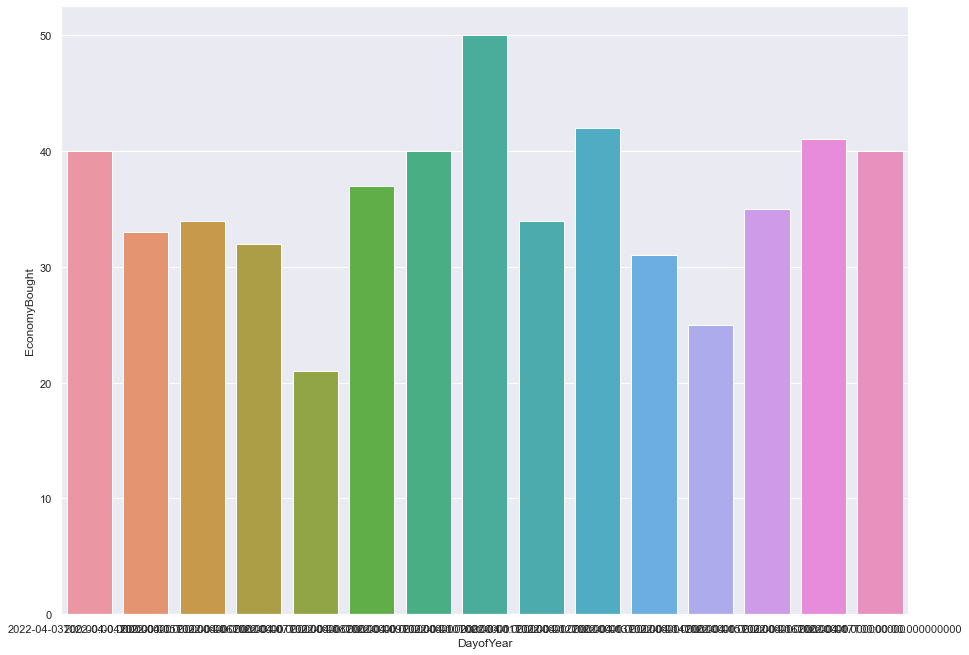

In [131]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='EconomyBought', data=pivot_economy_sandwich_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [132]:
## Pivot table for quantities of economy sandwich

pivot_economy_sandwich_quantity=pd.pivot_table(new_doc, values=['EconomyBought'], index=['DayofYear'], aggfunc=np.sum)
pivot_economy_sandwich_quantity.reset_index(inplace=True)
pivot_economy_sandwich_quantity

,DayofYear,EconomyBought
0,2022-04-03,65
1,2022-04-04,54
2,2022-04-05,55
3,2022-04-06,52
4,2022-04-07,31
5,2022-04-08,58
6,2022-04-09,72
7,2022-04-10,82
8,2022-04-11,57
9,2022-04-12,66


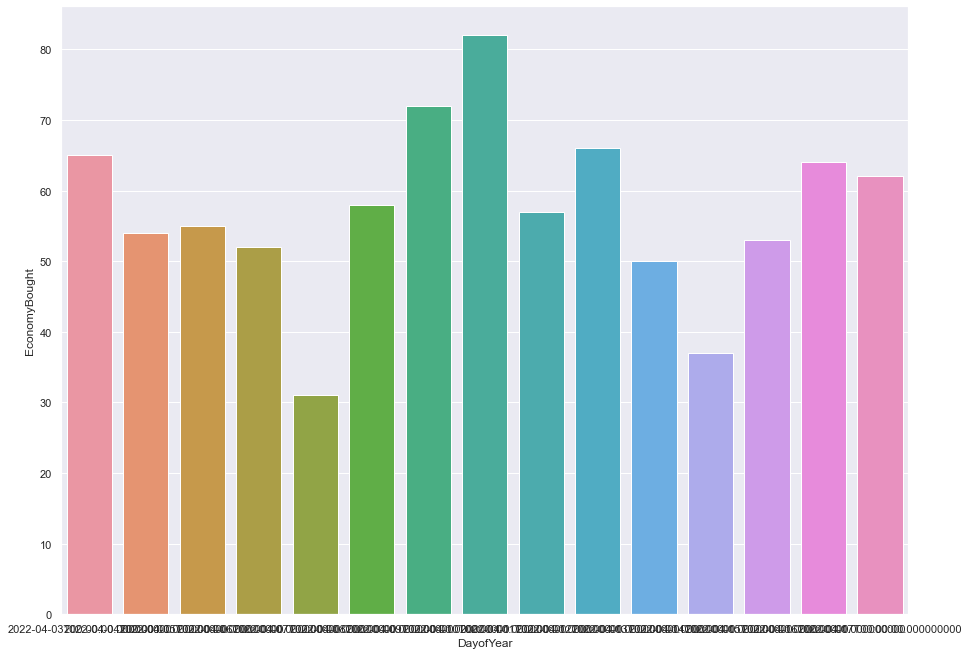

In [133]:
## Visiualization for the table above

plt.show; ax=sns.barplot( x='DayofYear', y='EconomyBought', data=pivot_economy_sandwich_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [134]:
## pivot table for count of transactions for RegularBought

pivot_regular_sandwich_count=pd.pivot_table(new_doc[new_doc['RegularBought']>0] , values=['RegularBought'], index=['DayofYear'], aggfunc='count')
pivot_regular_sandwich_count.reset_index(inplace=True)
pivot_regular_sandwich_count

,DayofYear,RegularBought
0,2022-04-03,23
1,2022-04-04,19
2,2022-04-05,22
3,2022-04-06,16
4,2022-04-07,16
5,2022-04-08,27
6,2022-04-09,25
7,2022-04-10,30
8,2022-04-11,21
9,2022-04-12,23


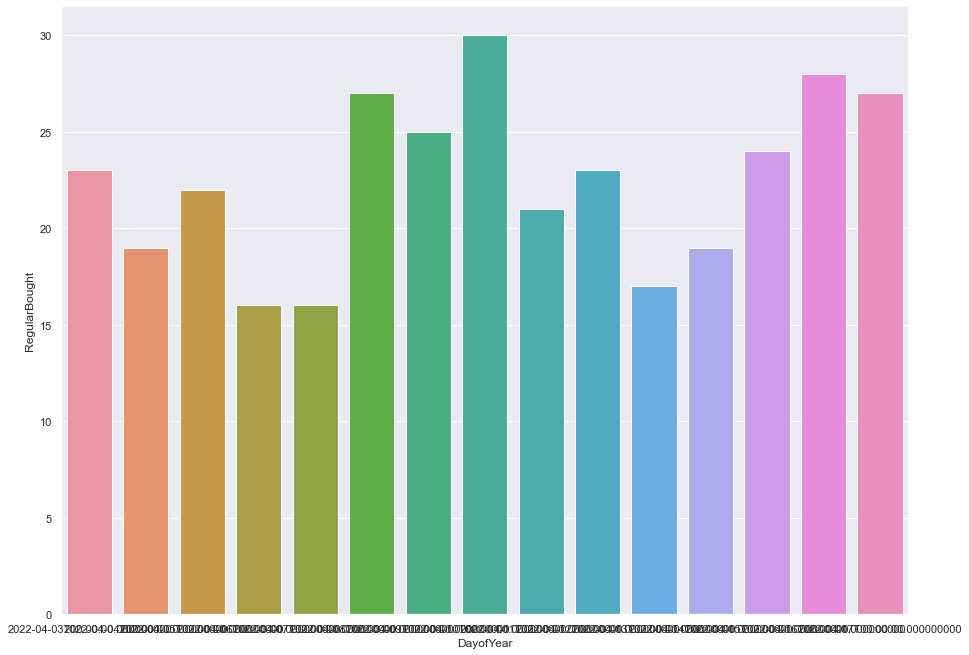

In [135]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='RegularBought', data=pivot_regular_sandwich_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [136]:
## pivot table for quantities for RegularBought

pivot_regular_sandwich_quantity=pd.pivot_table(new_doc, values=['RegularBought'], index=['DayofYear'], aggfunc=np.sum)
pivot_regular_sandwich_quantity.reset_index(inplace=True)
pivot_regular_sandwich_quantity

,DayofYear,RegularBought
0,2022-04-03,34
1,2022-04-04,30
2,2022-04-05,33
3,2022-04-06,27
4,2022-04-07,25
5,2022-04-08,40
6,2022-04-09,36
7,2022-04-10,44
8,2022-04-11,32
9,2022-04-12,35


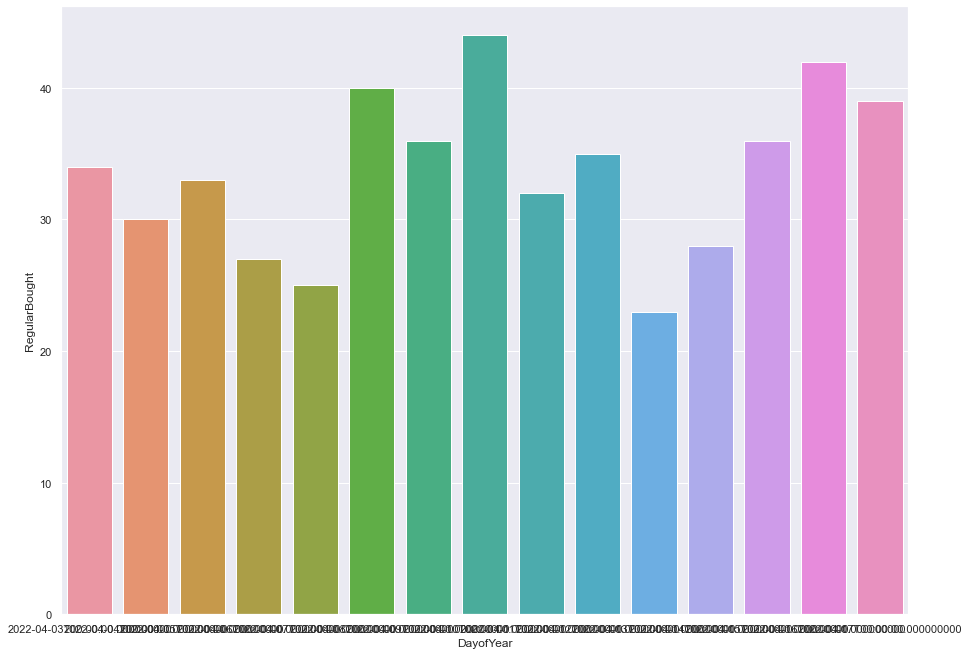

In [137]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='RegularBought', data=pivot_regular_sandwich_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [138]:
## pivot table for count of transactions for DeluxeBought

pivot_deluxe_sandwich_count=pd.pivot_table(new_doc[new_doc['DeluxeBought']>0] , values=['DeluxeBought'], index=['DayofYear'], aggfunc='count')
pivot_deluxe_sandwich_count.reset_index(inplace=True)
pivot_deluxe_sandwich_count

,DayofYear,DeluxeBought
0,2022-04-03,29
1,2022-04-04,23
2,2022-04-05,20
3,2022-04-06,18
4,2022-04-07,15
5,2022-04-08,29
6,2022-04-09,22
7,2022-04-10,26
8,2022-04-11,19
9,2022-04-12,27


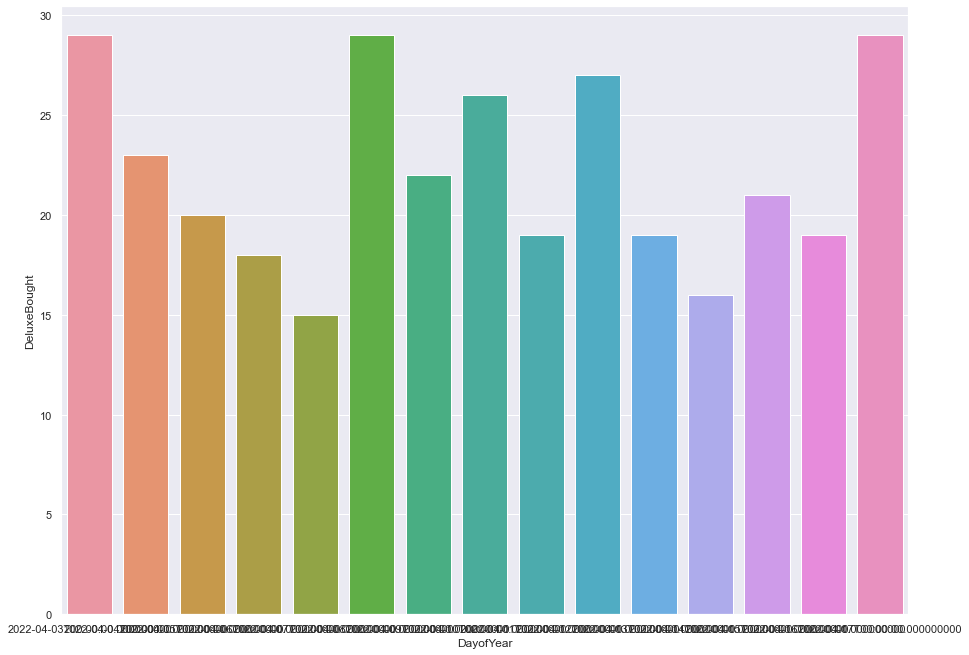

In [139]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='DeluxeBought', data=pivot_deluxe_sandwich_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [140]:
## pivot table for quantities for DeluxeBought

pivot_deluxe_sandwich_quantity=pd.pivot_table(new_doc, values=['DeluxeBought'], index=['DayofYear'], aggfunc=np.sum)
pivot_deluxe_sandwich_quantity.reset_index(inplace=True)
pivot_deluxe_sandwich_quantity

,DayofYear,DeluxeBought
0,2022-04-03,43
1,2022-04-04,34
2,2022-04-05,28
3,2022-04-06,26
4,2022-04-07,20
5,2022-04-08,43
6,2022-04-09,32
7,2022-04-10,38
8,2022-04-11,29
9,2022-04-12,39


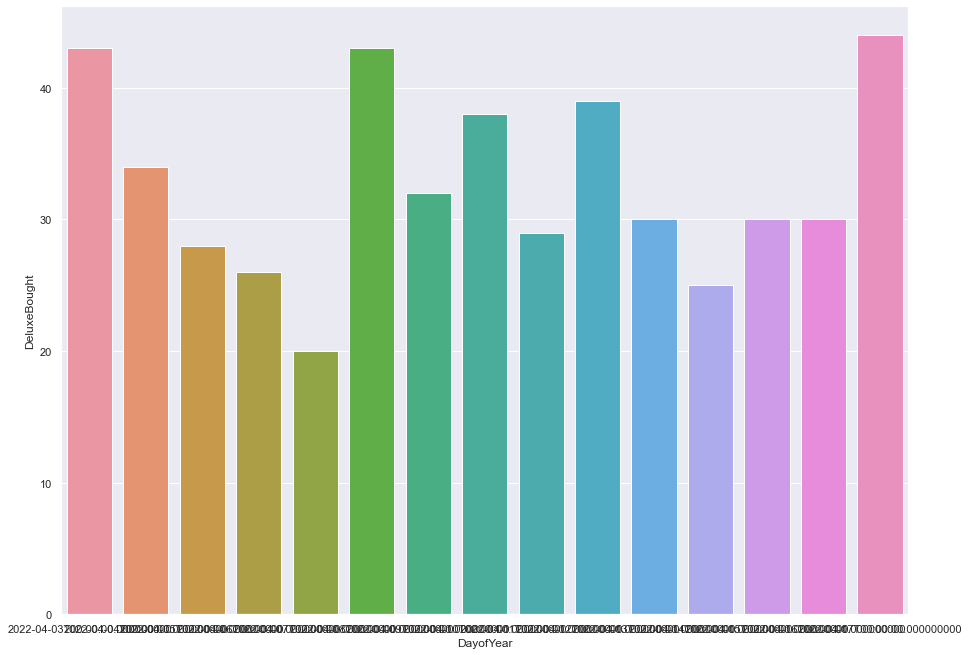

In [141]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='DayofYear', y='DeluxeBought', data=pivot_deluxe_sandwich_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [142]:
### create a table which have counts of transactions for 3 sandwich

sandwich_count=pd.merge(pivot_economy_sandwich_count,pivot_regular_sandwich_count)
sandwich_count = pd.merge(sandwich_count, pivot_deluxe_sandwich_count)
sandwich_count

,DayofYear,EconomyBought,RegularBought,DeluxeBought
0,2022-04-03,40,23,29
1,2022-04-04,33,19,23
2,2022-04-05,34,22,20
3,2022-04-06,32,16,18
4,2022-04-07,21,16,15
5,2022-04-08,37,27,29
6,2022-04-09,40,25,22
7,2022-04-10,50,30,26
8,2022-04-11,34,21,19
9,2022-04-12,42,23,27


In [143]:
salad_sandwich_count=pd.merge(salad_count,sandwich_count)
salad_sandwich_count

,DayofYear,RegularSalad,EconomySalad,DeluxeSalad,EconomyBought,RegularBought,DeluxeBought
0,2022-04-03,5,40,3,40,23,29
1,2022-04-04,3,33,6,33,19,23
2,2022-04-05,4,34,4,34,22,20
3,2022-04-06,4,32,7,32,16,18
4,2022-04-07,1,21,2,21,16,15
5,2022-04-08,6,37,8,37,27,29
6,2022-04-09,5,40,3,40,25,22
7,2022-04-10,7,50,6,50,30,26
8,2022-04-11,4,34,2,34,21,19
9,2022-04-14,2,25,7,25,19,16


In [144]:
salad_sandwich_count.sum()

C:\Users\barry\AppData\Local\Temp/ipykernel_29844/3932536399.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  salad_sandwich_count.sum()


RegularSalad      51
EconomySalad     462
DeluxeSalad       63
EconomyBought    462
RegularBought    297
DeluxeBought     286
dtype: int64

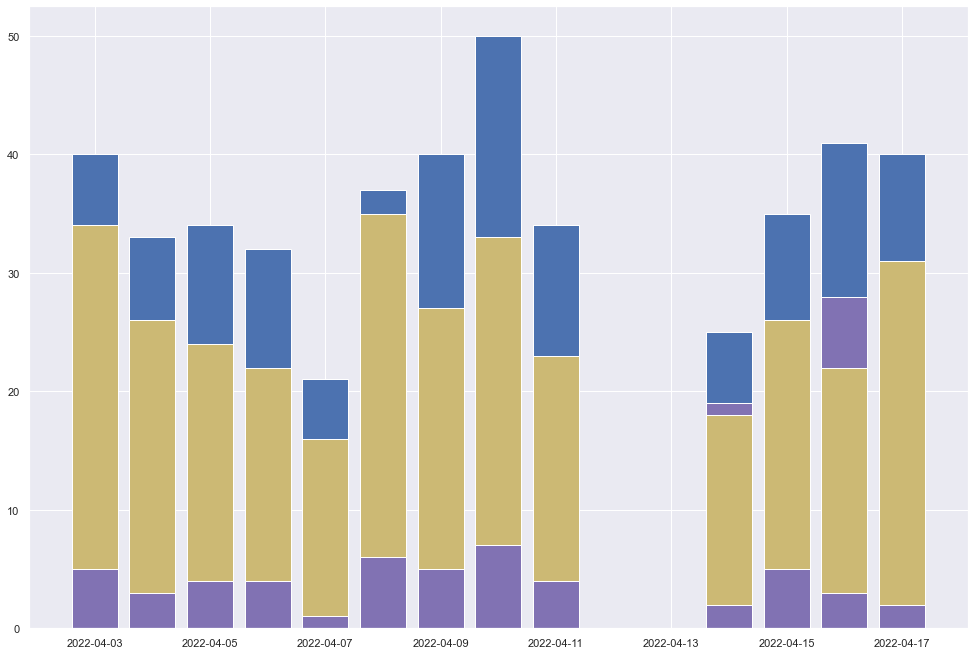

In [145]:
## Visiualize the table
x=salad_sandwich_count['DayofYear']
y1=salad_sandwich_count['RegularSalad']
y2=salad_sandwich_count['EconomySalad']
y3=salad_sandwich_count['DeluxeSalad']
y4=salad_sandwich_count['EconomyBought']
y5=salad_sandwich_count['RegularBought']
y6=salad_sandwich_count['DeluxeBought']
plt.bar(x, y1, color='g')
plt.bar(x, y2,color='r')
plt.bar(x, y3,color='c')
plt.bar(x, y4,color='b')
plt.bar(x, y5,color='m')
plt.bar(x, y6, bottom=y1, color='y')
plt.show()

In [146]:
### create a table which have quantities for 3 sandwich

sandwich_quantity = pd.merge(pivot_economy_sandwich_quantity,pivot_regular_sandwich_quantity)
sandwich_quantity = pd.merge(sandwich_quantity, pivot_deluxe_sandwich_quantity)
sandwich_quantity

,DayofYear,EconomyBought,RegularBought,DeluxeBought
0,2022-04-03,65,34,43
1,2022-04-04,54,30,34
2,2022-04-05,55,33,28
3,2022-04-06,52,27,26
4,2022-04-07,31,25,20
5,2022-04-08,58,40,43
6,2022-04-09,72,36,32
7,2022-04-10,82,44,38
8,2022-04-11,57,32,29
9,2022-04-12,66,35,39


In [147]:
sandwich_quantity.sum()

C:\Users\barry\AppData\Local\Temp/ipykernel_29844/2194503650.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sandwich_quantity.sum()


EconomyBought    858
RegularBought    504
DeluxeBought     491
dtype: int64

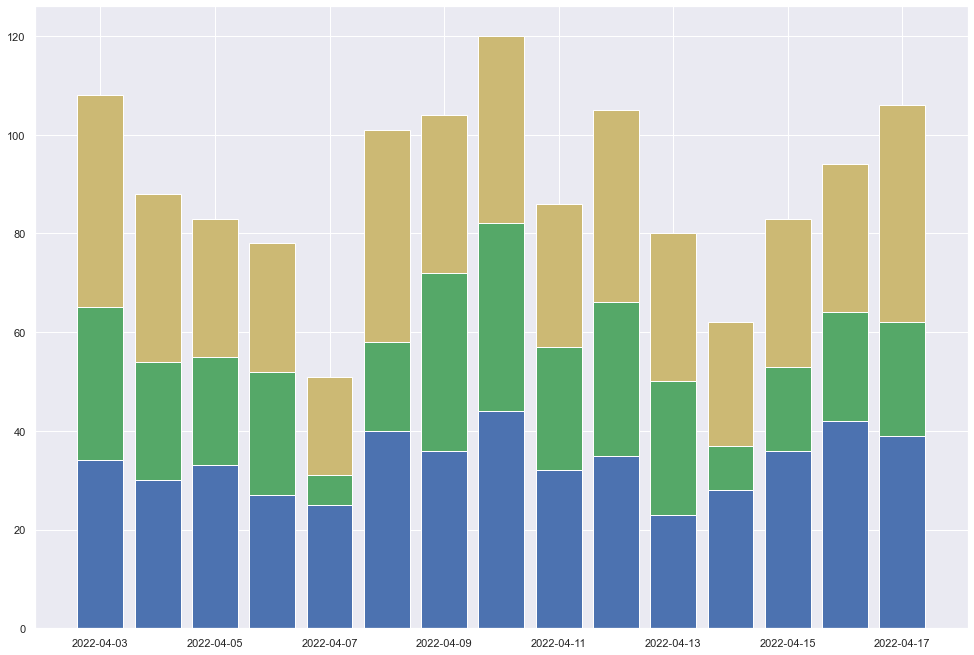

In [148]:
## Visiualize the table
x=sandwich_quantity['DayofYear']
y1=sandwich_quantity['EconomyBought']
y2=sandwich_quantity['RegularBought']
y3=sandwich_quantity['DeluxeBought']
plt.bar(x, y1, color='g')
plt.bar(x, y2)
plt.bar(x, y3, bottom=y1, color='y')
plt.show()

### Data preparation for Market Basket Analysis

In [149]:
## create the basket dataset 
basket=raw[['CheckoutID', 'EconomyBought',
       'EconomyToasted', 'EconomySalad', 'EconomyIsLarge', 'RegularBought',
       'RegularToasted', 'RegularSalad', 'RegularIsLarge', 'DeluxeBought',
       'DeluxeToasted', 'DeluxeSalad', 'DeluxeIsLarge', 'BottledDrink',
       'BottledWater', 'NonBottledDrink', 'Chips', 'Cookie']]

In [150]:
## check the size of the basket dataset. There are 8300 records totally in the basket dataset.
basket.shape

(8300, 18)

In [151]:
## convert all 'True', 'False' to number 1 or 0
basket=basket.astype(int)
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CheckoutID       8300 non-null   int32
 1   EconomyBought    8300 non-null   int32
 2   EconomyToasted   8300 non-null   int32
 3   EconomySalad     8300 non-null   int32
 4   EconomyIsLarge   8300 non-null   int32
 5   RegularBought    8300 non-null   int32
 6   RegularToasted   8300 non-null   int32
 7   RegularSalad     8300 non-null   int32
 8   RegularIsLarge   8300 non-null   int32
 9   DeluxeBought     8300 non-null   int32
 10  DeluxeToasted    8300 non-null   int32
 11  DeluxeSalad      8300 non-null   int32
 12  DeluxeIsLarge    8300 non-null   int32
 13  BottledDrink     8300 non-null   int32
 14  BottledWater     8300 non-null   int32
 15  NonBottledDrink  8300 non-null   int32
 16  Chips            8300 non-null   int32
 17  Cookie           8300 non-null   int32
dtypes: int32

In [152]:
basket.head()

,CheckoutID,EconomyBought,EconomyToasted,EconomySalad,EconomyIsLarge,RegularBought,RegularToasted,RegularSalad,RegularIsLarge,DeluxeBought,DeluxeToasted,DeluxeSalad,DeluxeIsLarge,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie
0,538641,2,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2,0
1,538642,1,1,0,1,2,1,0,0,1,0,0,0,2,0,2,3,1
2,538643,2,0,1,1,2,1,0,0,1,0,0,0,1,0,4,1,4
3,538644,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,538645,2,1,0,1,0,0,0,0,2,1,0,0,1,0,3,3,1


In [153]:
## convert all numbers to 1 or 0. If the number is greater than or equal to 1, then returns 1; if the number is less than or equal to 0, returns 0. Now we don't
## need the CheckoutID anay more, so we can drop this column.

def convert_1(x):
    if x <=0:
        return 0
    if x >=1:
        return 1
basket=basket.applymap(convert_1)
basket = basket.drop(columns=['CheckoutID'], axis=1)


In [154]:
## The primary products package is large size economy salad, get a new dataset which has the primary products package for sure
basket_salad= basket.loc[basket['EconomySalad']==1, : ]
primary_basket = basket.loc[(basket['EconomySalad']==1)&(basket['EconomyIsLarge']==1), : ]
primary_basket.shape, basket_salad.shape

((535, 17), (1127, 17))

In [155]:
primary_basket.head()

,EconomyBought,EconomyToasted,EconomySalad,EconomyIsLarge,RegularBought,RegularToasted,RegularSalad,RegularIsLarge,DeluxeBought,DeluxeToasted,DeluxeSalad,DeluxeIsLarge,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie
2,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1
9,1,0,1,1,1,1,0,1,1,0,0,0,1,0,1,0,1
44,1,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1
59,1,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1
61,1,0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1


In [156]:
#primary_basket.to_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/basket_sandwich_salad.csv')

In [157]:
## Support for economy salad only and support for large size economy salad
support_salad= basket_salad.shape[0]/raw.shape[0]
support_primary = primary_basket.shape[0]/raw.shape[0]
support_salad, support_primary

(0.13578313253012048, 0.06445783132530121)

In [158]:
## calculate the min_support

min_sup=support_salad*support_primary
min_sup

0.008752286253447525

In [159]:
primary_basket.columns

Index(['EconomyBought', 'EconomyToasted', 'EconomySalad', 'EconomyIsLarge',
       'RegularBought', 'RegularToasted', 'RegularSalad', 'RegularIsLarge',
       'DeluxeBought', 'DeluxeToasted', 'DeluxeSalad', 'DeluxeIsLarge',
       'BottledDrink', 'BottledWater', 'NonBottledDrink', 'Chips', 'Cookie'],
      dtype='object')

In [160]:
## Create the basket for 5 related products

basket_5=primary_basket.drop(columns =['EconomyBought', 'EconomyToasted', 'EconomyIsLarge',
       'RegularBought', 'RegularToasted', 'RegularSalad', 'RegularIsLarge',
       'DeluxeBought', 'DeluxeToasted', 'DeluxeSalad', 'DeluxeIsLarge'], axis=1)
basket_5.head()

,EconomySalad,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie
2,1,1,0,1,1,1
9,1,1,0,1,0,1
44,1,1,0,1,1,1
59,1,1,0,1,1,1
61,1,1,0,1,1,1


In [208]:
basket_5.shape

(535, 6)

In [161]:
##basket_5.to_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/basket_5_products.csv')

## Qeustion 5-2:Market Basket Analysis for UKP with salads and sandwiches

In [162]:
### As mentioned above, the primary product is large size economy salad, so we drop some noisy columns such as 'EconomyToasted', 
### 'EconomyIsLarge', 'RegularToasted', 'RegularIsLarge','DeluxeToasted', 'DeluxeIsLarge'

primary_basket=primary_basket.drop(columns =['EconomyToasted','EconomyIsLarge', 'RegularToasted', 'RegularIsLarge','DeluxeToasted', 'DeluxeIsLarge','BottledDrink', 'BottledWater', 'NonBottledDrink', 'Chips', 'Cookie'], axis=1)

In [163]:
primary_basket.head()

,EconomyBought,EconomySalad,RegularBought,RegularSalad,DeluxeBought,DeluxeSalad
2,1,1,1,0,1,0
9,1,1,1,0,1,0
44,1,1,1,0,1,0
59,1,1,1,0,1,0
61,1,1,0,0,1,0


In [164]:

freq_itemsets = apriori(primary_basket,min_support=min_sup,use_colnames=True)
freq_itemsets['length']= freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets.head(20)

C:\Users\barry\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,1.000000,(EconomyBought),1
1,1.000000,(EconomySalad),1
2,0.629907,(RegularBought),1
3,0.104673,(RegularSalad),1
4,0.620561,(DeluxeBought),1
5,0.127103,(DeluxeSalad),1
6,1.000000,"(EconomyBought, EconomySalad)",2
7,0.629907,"(EconomyBought, RegularBought)",2
8,0.104673,"(EconomyBought, RegularSalad)",2
9,0.620561,"(EconomyBought, DeluxeBought)",2


In [165]:
freq_itemsets.shape

(63, 3)

In [166]:
## Get all social rules

rules = association_rules(freq_itemsets,metric='lift',min_threshold=1)
with pd.option_context('display.max_colwidth', None):

    display(rules.sort_values(by='lift',ascending=False).head(10))
#rules.sort_values(by='lift',ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
458,"(DeluxeSalad, RegularSalad)","(EconomyBought, DeluxeBought, RegularBought, EconomySalad)",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
446,"(DeluxeSalad, EconomyBought, RegularSalad)","(DeluxeBought, RegularBought, EconomySalad)",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
439,"(EconomyBought, DeluxeBought, RegularBought, EconomySalad)","(DeluxeSalad, RegularSalad)",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
461,"(DeluxeBought, RegularBought)","(DeluxeSalad, EconomySalad, EconomyBought, RegularSalad)",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
436,"(DeluxeSalad, EconomySalad, EconomyBought, RegularSalad)","(DeluxeBought, RegularBought)",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
450,"(EconomyBought, DeluxeBought, RegularBought)","(DeluxeSalad, EconomySalad, RegularSalad)",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
451,"(DeluxeBought, RegularBought, EconomySalad)","(DeluxeSalad, EconomyBought, RegularSalad)",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
267,"(DeluxeSalad, RegularSalad)","(DeluxeBought, RegularBought)",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
268,"(DeluxeBought, RegularBought)","(DeluxeSalad, RegularSalad)",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
410,"(DeluxeSalad, RegularSalad)","(DeluxeBought, RegularBought, EconomySalad)",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf


In [167]:
rules.shape

(476, 9)

In [168]:
## Export the file to csv

#rules.to_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/rules1.csv')

In [169]:
## Import the filtered file 

asso_rule=pd.read_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/rules.csv')

In [170]:
with pd.option_context('display.max_colwidth', None):

    display(asso_rule.sort_values(by='lift',ascending=False).head(10))
#asso_rule.sort_values(by='lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"frozenset({'DeluxeBought', 'EconomySalad', 'RegularBought'})","frozenset({'DeluxeSalad', 'RegularSalad', 'EconomyBought'})",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
151,"frozenset({'DeluxeSalad', 'EconomySalad', 'EconomyBought', 'RegularSalad'})","frozenset({'RegularBought', 'DeluxeBought'})",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
135,"frozenset({'DeluxeBought', 'EconomySalad', 'RegularBought'})","frozenset({'DeluxeSalad', 'RegularSalad'})",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
134,"frozenset({'DeluxeSalad', 'EconomySalad', 'RegularSalad'})","frozenset({'RegularBought', 'DeluxeBought'})",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
153,"frozenset({'EconomyBought', 'DeluxeBought', 'EconomySalad', 'RegularBought'})","frozenset({'DeluxeSalad', 'RegularSalad'})",0.349533,0.011215,0.011215,0.032086,2.860963,0.007295,1.021562
156,"frozenset({'DeluxeSalad', 'EconomySalad', 'RegularSalad'})","frozenset({'EconomyBought', 'RegularBought', 'DeluxeBought'})",0.011215,0.349533,0.011215,1.000000,2.860963,0.007295,inf
155,"frozenset({'DeluxeSalad', 'EconomySalad', 'RegularBought'})","frozenset({'EconomyBought', 'RegularSalad', 'DeluxeBought'})",0.085981,0.052336,0.011215,0.130435,2.492236,0.006715,1.089813
136,"frozenset({'EconomySalad', 'DeluxeBought', 'RegularSalad'})","frozenset({'DeluxeSalad', 'RegularBought'})",0.052336,0.085981,0.011215,0.214286,2.492236,0.006715,1.163297
133,"frozenset({'DeluxeSalad', 'EconomySalad', 'RegularBought'})","frozenset({'RegularSalad', 'DeluxeBought'})",0.085981,0.052336,0.011215,0.130435,2.492236,0.006715,1.089813
160,"frozenset({'EconomySalad', 'DeluxeBought', 'RegularSalad'})","frozenset({'DeluxeSalad', 'RegularBought', 'EconomyBought'})",0.052336,0.085981,0.011215,0.214286,2.492236,0.006715,1.163297


In [171]:
asso_rule.shape

(169, 9)

### Regarding the result above, we can see that RegularBought, DeluxeBought and  DeluxeSalad, EconomySald, EconomyBought, RegularSalad are the items that has the highest association each other since these two items has the highest 'lift' value.

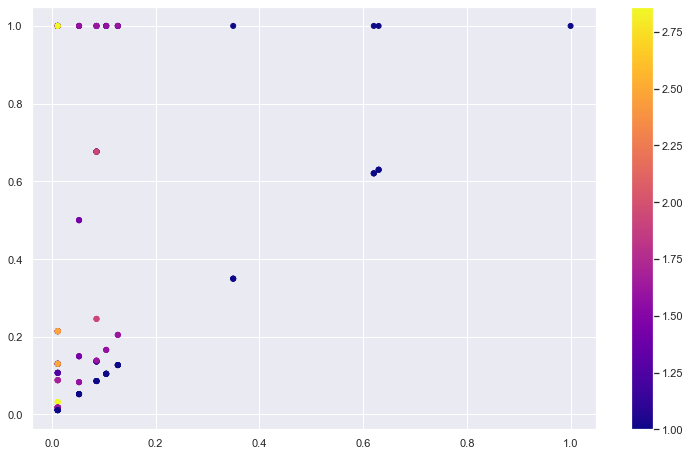

In [172]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True

x = asso_rule.support
y = asso_rule.confidence
z = asso_rule.lift

fig, ax = plt.subplots()

s = ax.scatter(x, y, c=z, s=100, marker='.', cmap='plasma')

fig.colorbar(s)

plt.show()

### Question 6: For your UKP, provide a count of transactions, and quantities analysis of 5 related items (bottled water, bottled drinks, nonbottled drinks, chips and cookies) for each hour of the day.

In [173]:
new_doc.columns

Index(['CheckoutID', 'DayofYear', 'DayofWeek', 'ShiftXtabID', 'TimeArrive',
       'Hour', 'EmployeeID', 'AgeRangeID', 'AgeRange', 'GenderID', 'Gender',
       'MorePersons', 'EconomyBought', 'EconomyToasted', 'EconomySalad',
       'EconomyIsLarge', 'RegularBought', 'RegularToasted', 'RegularSalad',
       'RegularIsLarge', 'DeluxeBought', 'DeluxeToasted', 'DeluxeSalad',
       'DeluxeIsLarge', 'BottledDrink', 'BottledWater', 'NonBottledDrink',
       'Chips', 'Cookie', 'CustSatisfactionID', 'IsToGo', 'zLnk', 'Inactive'],
      dtype='object')

In [174]:
## pivot table for count of transactions for BottleDrink

pivot_bottledrink_count=pd.pivot_table(new_doc[new_doc['BottledDrink']>0] , values=['BottledDrink'], index=['Hour'], aggfunc='count')
pivot_bottledrink_count.reset_index(inplace=True)
pivot_bottledrink_count

,Hour,BottledDrink
0,11,32
1,12,37
2,13,18
3,14,13
4,15,13
5,16,16
6,17,42
7,18,37
8,19,35
9,20,16


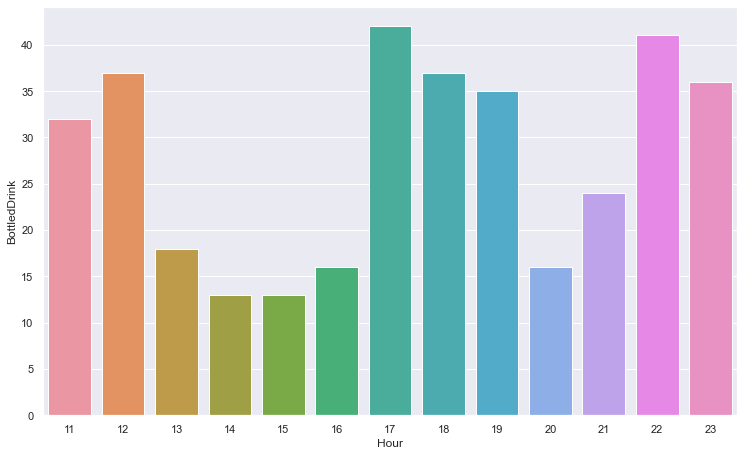

In [175]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='BottledDrink', data=pivot_bottledrink_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})


In [176]:
## pivot table for quantities for BottleDrink

pivot_bottledrink_quantity=pd.pivot_table(new_doc , values=['BottledDrink'], index=['Hour'], aggfunc=np.sum)
pivot_bottledrink_quantity.reset_index(inplace=True)
pivot_bottledrink_quantity

,Hour,BottledDrink
0,11,65
1,12,69
2,13,33
3,14,25
4,15,24
5,16,28
6,17,82
7,18,74
8,19,68
9,20,27


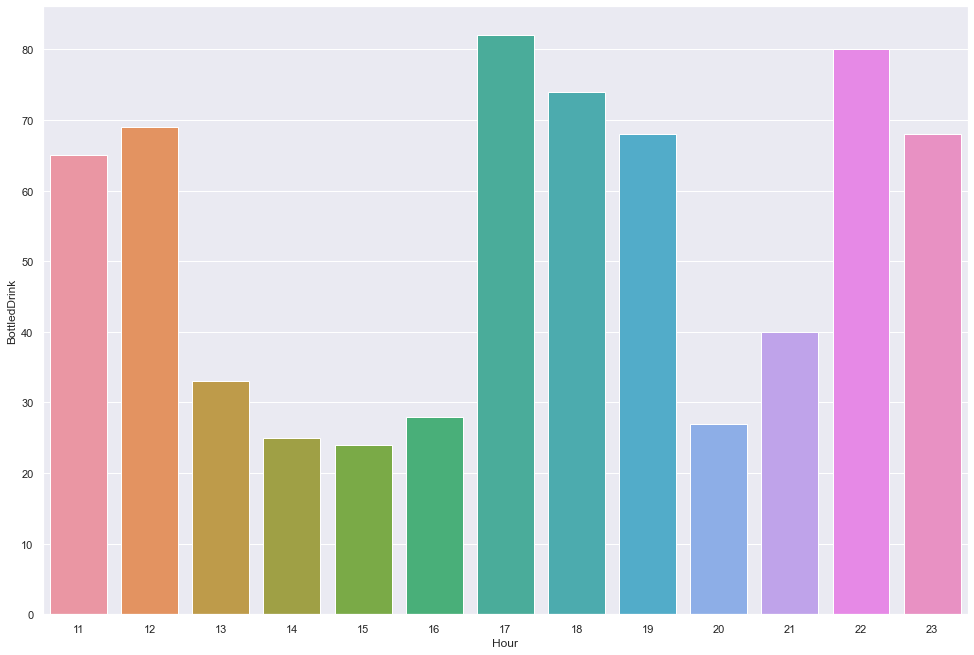

In [177]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='BottledDrink', data= pivot_bottledrink_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [178]:
## pivot table for count of transactions for BottledWater

pivot_BottledWater_count=pd.pivot_table(new_doc[new_doc['BottledWater']>0] , values=['BottledWater'], index='Hour', aggfunc='count')
pivot_BottledWater_count.reset_index(inplace=True)
pivot_BottledWater_count

,Hour,BottledWater
0,11,10
1,12,24
2,13,6
3,14,5
4,15,9
5,16,11
6,17,30
7,18,22
8,19,18
9,20,8


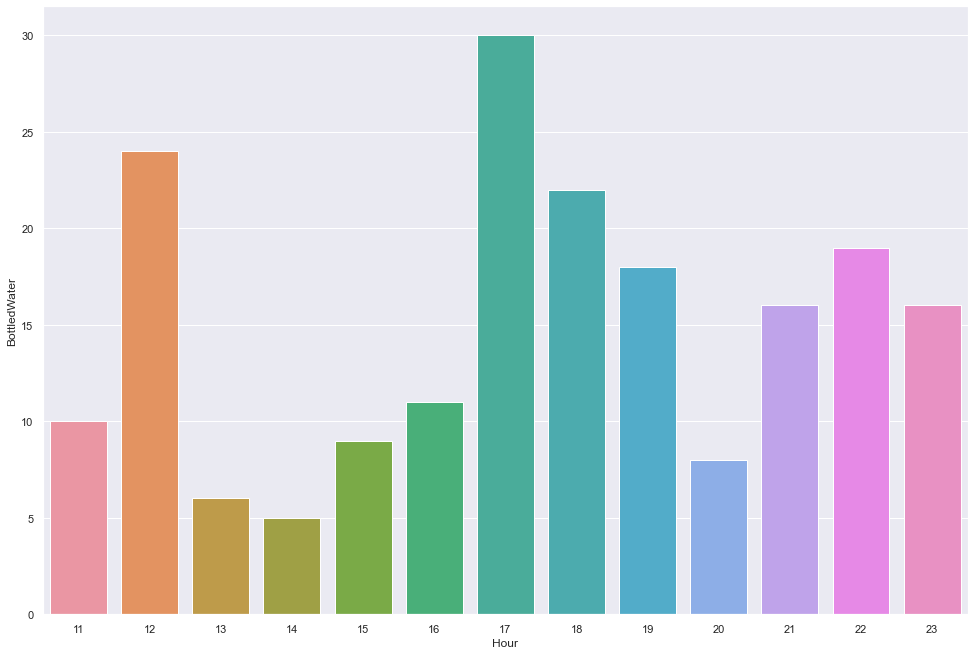

In [179]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='BottledWater', data=pivot_BottledWater_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [180]:
## pivot table for quantities for BottledWater

pivot_BottledWater_quantity=pd.pivot_table(new_doc , values=['BottledWater'], index=['Hour'], aggfunc= np.sum)
pivot_BottledWater_quantity.reset_index(inplace=True)
pivot_BottledWater_quantity

,Hour,BottledWater
0,11,21
1,12,56
2,13,15
3,14,12
4,15,19
5,16,20
6,17,48
7,18,46
8,19,32
9,20,18


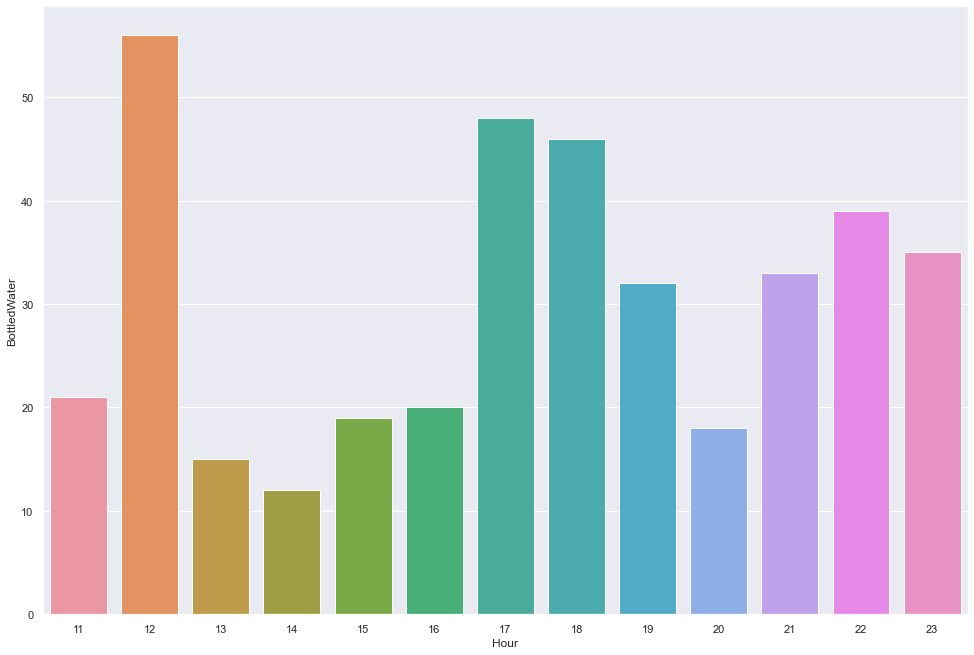

In [181]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='BottledWater', data= pivot_BottledWater_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [182]:
## pivot table for count of transactions for NonBottledDrink

pivot_NonBottledDrink_count=pd.pivot_table(new_doc[new_doc['NonBottledDrink']>0] , values=['NonBottledDrink'], index=['Hour'], aggfunc='count')
pivot_NonBottledDrink_count.reset_index(inplace=True)
pivot_NonBottledDrink_count

,Hour,NonBottledDrink
0,11,30
1,12,35
2,13,19
3,14,18
4,15,15
5,16,14
6,17,37
7,18,35
8,19,29
9,20,23


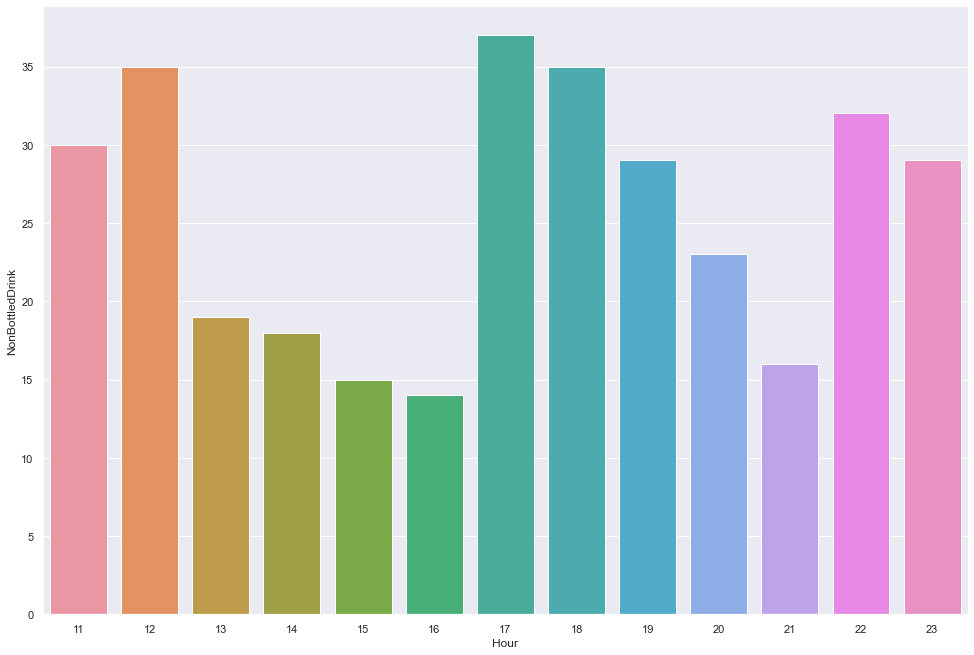

In [183]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='NonBottledDrink', data= pivot_NonBottledDrink_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [184]:
## pivot table for quantities for NonBottledDrink

pivot_NonBottledDrink_quantity=pd.pivot_table(new_doc, values=['NonBottledDrink'], index=['Hour'], aggfunc=np.sum)
pivot_NonBottledDrink_quantity.reset_index(inplace=True)
pivot_NonBottledDrink_quantity

,Hour,NonBottledDrink
0,11,64
1,12,95
2,13,46
3,14,44
4,15,39
5,16,30
6,17,97
7,18,78
8,19,65
9,20,57


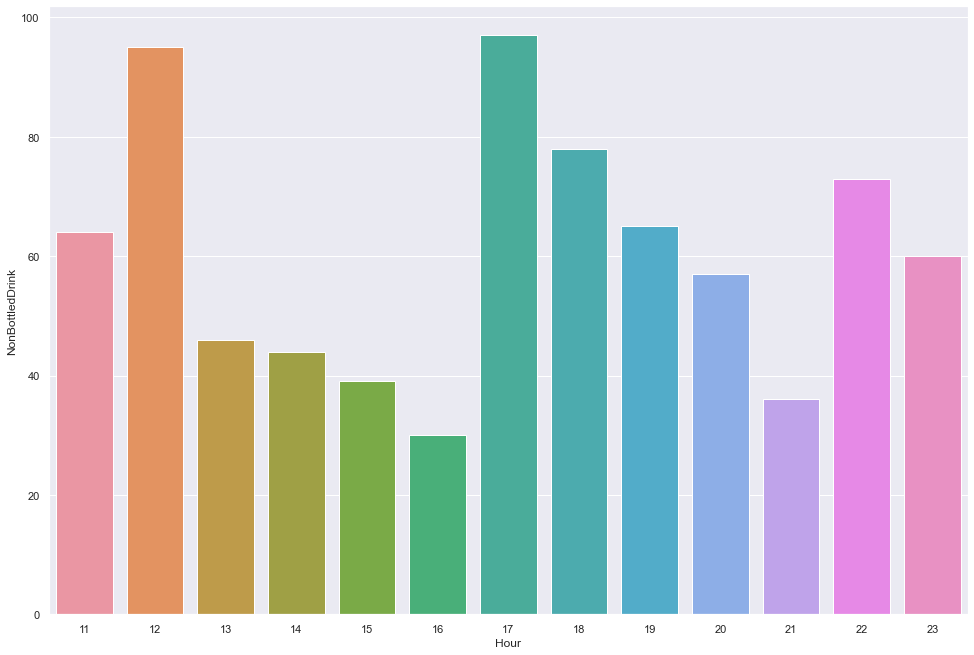

In [185]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='NonBottledDrink', data= pivot_NonBottledDrink_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [186]:
## pivot table for count of transactions for chips

pivot_Chips_count=pd.pivot_table(new_doc[new_doc['Chips']>0] , values=['Chips'], index=['Hour'], aggfunc='count')
pivot_Chips_count.reset_index(inplace=True)
pivot_Chips_count

,Hour,Chips
0,11,27
1,12,42
2,13,18
3,14,19
4,15,19
5,16,14
6,17,49
7,18,38
8,19,31
9,20,18


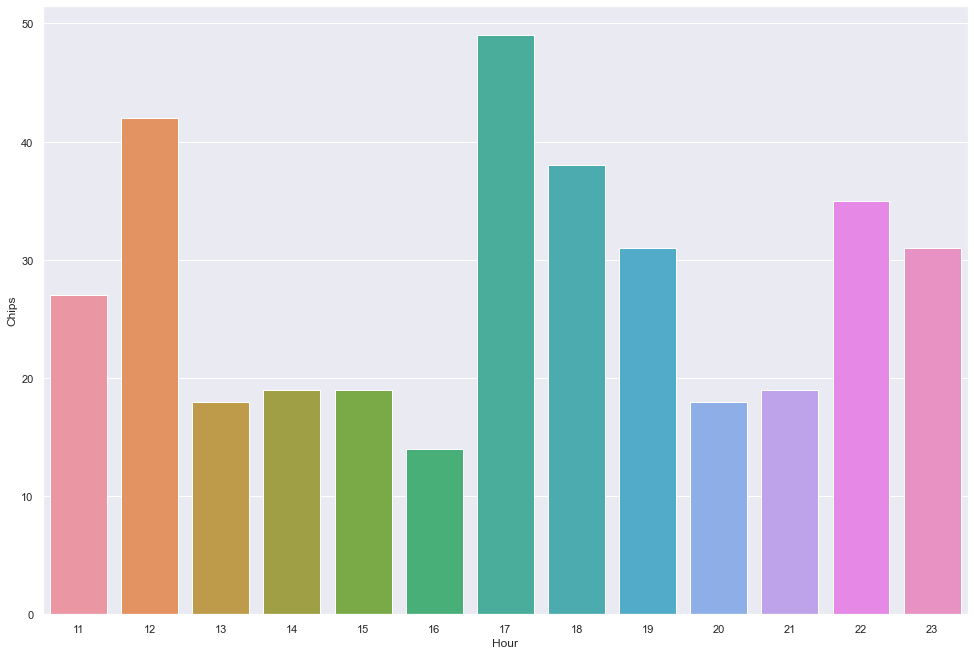

In [187]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='Chips', data= pivot_Chips_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [188]:
## pivot table of quantities for chips

pivot_Chips_quantity=pd.pivot_table(new_doc, values=['Chips'], index=['Hour'], aggfunc= np.sum)
pivot_Chips_quantity.reset_index(inplace=True)
pivot_Chips_quantity

,Hour,Chips
0,11,52
1,12,84
2,13,38
3,14,36
4,15,34
5,16,24
6,17,84
7,18,74
8,19,60
9,20,28


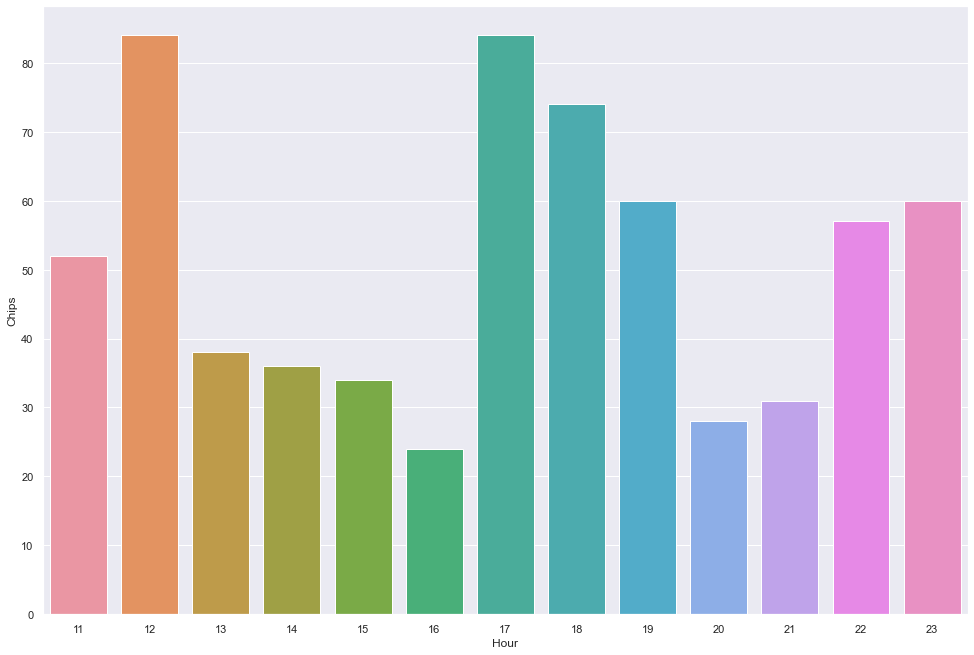

In [189]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='Chips', data= pivot_Chips_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [190]:
## pivot table for count of transactions for Cookie

pivot_Cookie_count=pd.pivot_table(new_doc[new_doc['Cookie']>0] , values=['Cookie'], index=['Hour'], aggfunc='count')
pivot_Cookie_count.reset_index(inplace=True)
pivot_Cookie_count

,Hour,Cookie
0,11,33
1,12,40
2,13,22
3,14,19
4,15,17
5,16,18
6,17,49
7,18,44
8,19,37
9,20,26


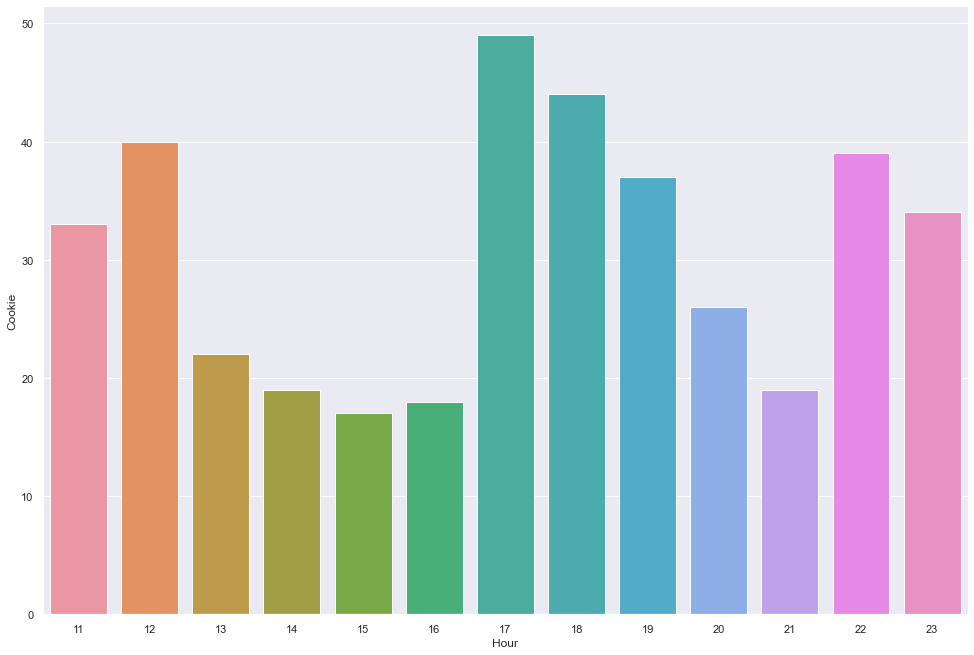

In [191]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='Cookie', data= pivot_Cookie_count) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [192]:
## pivot table of quantities for Cookie

pivot_Cookie_quantity =pd.pivot_table(new_doc , values=['Cookie'], index=['Hour'], aggfunc=np.sum)
pivot_Cookie_quantity.reset_index(inplace=True)
pivot_Cookie_quantity

,Hour,Cookie
0,11,78
1,12,90
2,13,45
3,14,39
4,15,37
5,16,38
6,17,113
7,18,92
8,19,80
9,20,63


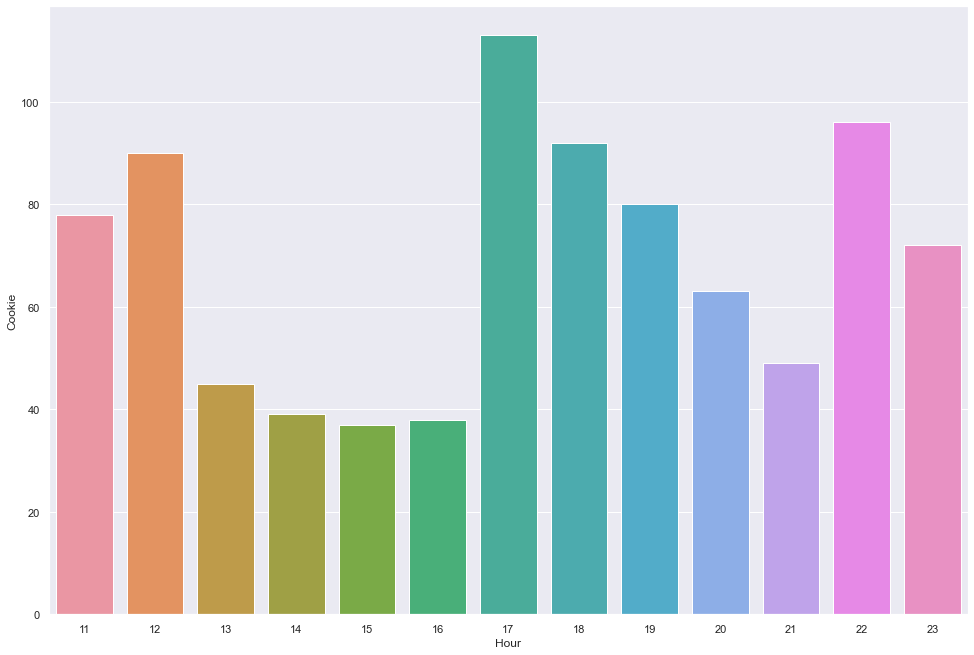

In [193]:
## Bar chart for the table

plt.show; ax=sns.barplot( x='Hour', y='Cookie', data= pivot_Cookie_quantity) 
sns.set(rc={'figure.figsize':(13.7,9.27)})

In [194]:
## create a new table which has the counts of transactions for all 5 products

all_5_count =pd.merge(pivot_bottledrink_count, pivot_BottledWater_count)
all_5_count = pd.merge(all_5_count, pivot_NonBottledDrink_count)
all_5_count = pd.merge(all_5_count, pivot_Chips_count)
all_5_count = pd.merge(all_5_count, pivot_Cookie_count)
all_5_count

,Hour,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie
0,11,32,10,30,27,33
1,12,37,24,35,42,40
2,13,18,6,19,18,22
3,14,13,5,18,19,19
4,15,13,9,15,19,17
5,16,16,11,14,14,18
6,17,42,30,37,49,49
7,18,37,22,35,38,44
8,19,35,18,29,31,37
9,20,16,8,23,18,26


In [195]:
all_5_count.sum()

Hour               221
BottledDrink       360
BottledWater       194
NonBottledDrink    332
Chips              360
Cookie             397
dtype: int64

<AxesSubplot:>

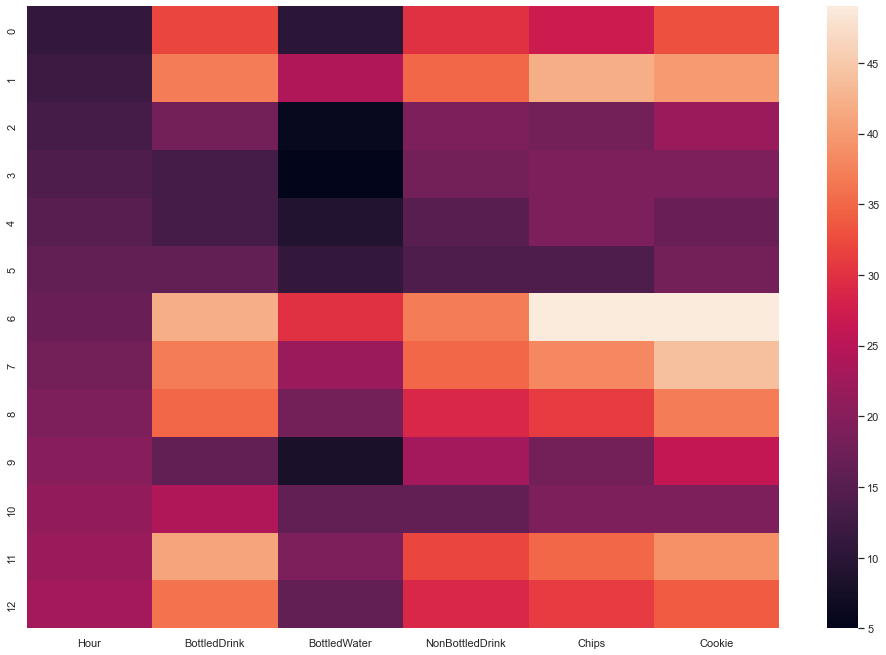

In [196]:
sns.heatmap(all_5_count)

In [197]:
## create a new table which has the quantities for all 5 products

all_5_quantity =pd.merge(pivot_bottledrink_quantity, pivot_BottledWater_quantity)
all_5_quantity = pd.merge(all_5_quantity, pivot_NonBottledDrink_quantity)
all_5_quantity = pd.merge(all_5_quantity, pivot_Chips_quantity)
all_5_quantity = pd.merge(all_5_quantity, pivot_Cookie_quantity)
all_5_quantity

,Hour,BottledDrink,BottledWater,NonBottledDrink,Chips,Cookie
0,11,65,21,64,52,78
1,12,69,56,95,84,90
2,13,33,15,46,38,45
3,14,25,12,44,36,39
4,15,24,19,39,34,37
5,16,28,20,30,24,38
6,17,82,48,97,84,113
7,18,74,46,78,74,92
8,19,68,32,65,60,80
9,20,27,18,57,28,63


In [198]:
all_5_quantity.sum()

Hour               221
BottledDrink       683
BottledWater       394
NonBottledDrink    784
Chips              662
Cookie             892
dtype: int64

<AxesSubplot:>

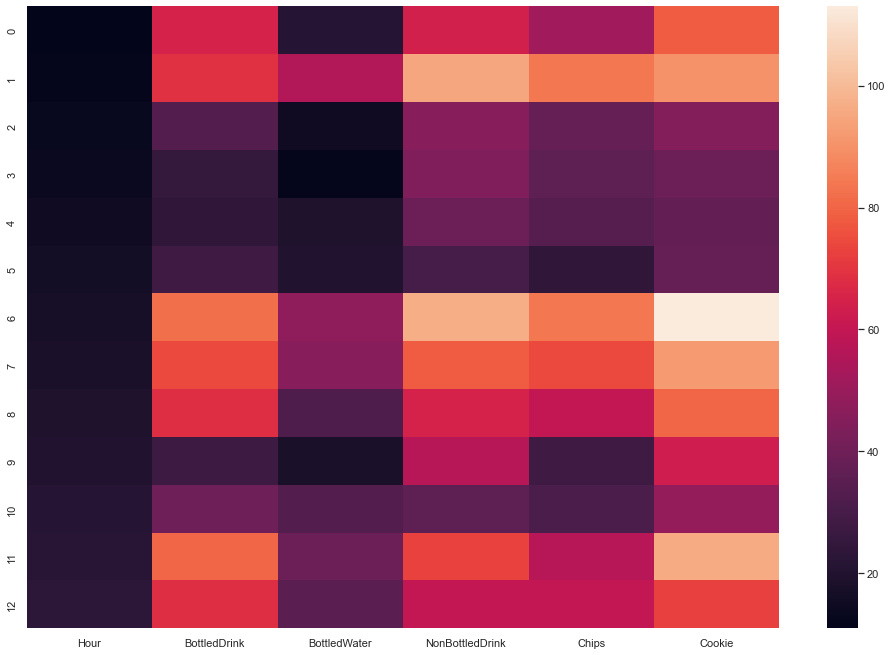

In [199]:
sns.heatmap(all_5_quantity)

## Question 7: Market Basket Analysis for UKP with 5 related products(bottled water, bottled drinks, nonbottled drinks, chips and cookies)

In [200]:
## get the support for 5 related products

freq_itemsets_5 = apriori(basket_5,min_support=min_sup,use_colnames=True)
freq_itemsets_5['length']= freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets_5.head()

C:\Users\barry\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,1.000000,(EconomySalad),1
1,0.672897,(BottledDrink),1
2,0.362617,(BottledWater),1
3,0.620561,(NonBottledDrink),1
4,0.672897,(Chips),1


In [201]:
freq_itemsets_5.shape

(47, 3)

In [202]:
## Get all social rules for 5 related products

rules_5 = association_rules(freq_itemsets_5,metric='lift',min_threshold=1)
rules_5.sort_values(by='lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
173,"(BottledDrink, NonBottledDrink, EconomySalad)","(Chips, Cookie)",0.433645,0.480374,0.315888,0.728448,1.51642,0.107576,1.913544
181,"(BottledDrink, NonBottledDrink)","(Chips, Cookie, EconomySalad)",0.433645,0.480374,0.315888,0.728448,1.51642,0.107576,1.913544
156,"(BottledDrink, NonBottledDrink)","(Chips, Cookie)",0.433645,0.480374,0.315888,0.728448,1.51642,0.107576,1.913544
180,"(Chips, Cookie, EconomySalad)","(BottledDrink, NonBottledDrink)",0.480374,0.433645,0.315888,0.657588,1.51642,0.107576,1.654014
157,"(Chips, Cookie)","(BottledDrink, NonBottledDrink)",0.480374,0.433645,0.315888,0.657588,1.51642,0.107576,1.654014


In [203]:
rules_5.shape

(196, 9)

In [204]:
## Export the file to csv

#rules_5.to_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/rules_5.csv')

In [205]:
## after cleanning the rule document, import the file

asso_rule_5 =pd.read_csv('D:/Business Analytics/Second Term/Diagnostic Analysis 8145/Practical E/data/rules_5.csv')
asso_rule_5.shape

(73, 9)

In [206]:
with pd.option_context('display.max_colwidth', None):

    display(asso_rule_5.sort_values(by='lift',ascending=False).head(10))
#asso_rule_5.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"frozenset({'Cookie', 'EconomySalad', 'Chips'})","frozenset({'BottledDrink', 'NonBottledDrink'})",0.480374,0.433645,0.315888,0.657588,1.516420,0.107576,1.654014
63,"frozenset({'BottledDrink', 'EconomySalad', 'NonBottledDrink'})","frozenset({'Cookie', 'Chips'})",0.433645,0.480374,0.315888,0.728448,1.516420,0.107576,1.913544
70,"frozenset({'EconomySalad', 'NonBottledDrink'})","frozenset({'Cookie', 'BottledDrink', 'Chips'})",0.620561,0.340187,0.315888,0.509036,1.496343,0.104781,1.343914
59,"frozenset({'Cookie', 'BottledDrink', 'EconomySalad', 'Chips'})",frozenset({'NonBottledDrink'}),0.340187,0.620561,0.315888,0.928571,1.496343,0.104781,5.312150
51,"frozenset({'Cookie', 'EconomySalad', 'Chips'})",frozenset({'NonBottledDrink'}),0.480374,0.620561,0.441121,0.918288,1.479771,0.143020,4.643614
54,"frozenset({'EconomySalad', 'NonBottledDrink'})","frozenset({'Cookie', 'Chips'})",0.620561,0.480374,0.441121,0.710843,1.479771,0.143020,1.797040
67,"frozenset({'EconomySalad', 'NonBottledDrink', 'Chips'})","frozenset({'Cookie', 'BottledDrink'})",0.441121,0.504673,0.315888,0.716102,1.418942,0.093266,1.744734
62,"frozenset({'Cookie', 'BottledDrink', 'EconomySalad'})","frozenset({'NonBottledDrink', 'Chips'})",0.504673,0.441121,0.315888,0.625926,1.418942,0.093266,1.494032
42,"frozenset({'EconomySalad', 'NonBottledDrink'})","frozenset({'Cookie', 'BottledDrink'})",0.620561,0.504673,0.433645,0.698795,1.384650,0.120465,1.644486
37,"frozenset({'Cookie', 'BottledDrink', 'EconomySalad'})",frozenset({'NonBottledDrink'}),0.504673,0.620561,0.433645,0.859259,1.384650,0.120465,2.696016


### Regarding the result above, we can see that BottleDrink, EconomySalad, NonBottleDrink and Cookie, Chips are the items that has the highest association each other since these two items has the highest 'lift' and 'confidence' value.

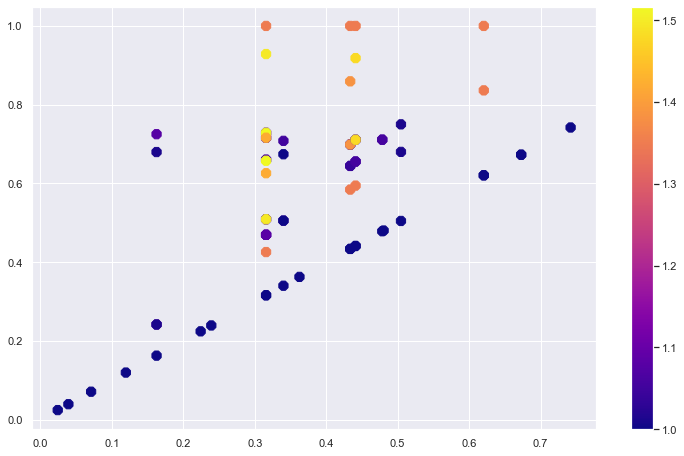

In [207]:
plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True

x = asso_rule_5.support
y = asso_rule_5.confidence
z = asso_rule_5.lift

fig, ax = plt.subplots()

s = ax.scatter(x, y, c=z, s=100, marker='8', cmap='plasma')

fig.colorbar(s)

plt.show()

### Conclusion

#### Based on the market basket analysis, we could find that:
#### 1. RegularBought, DeluxeBought, DeluxeSalad, EconomySald, EconomyBought, and RegularSalad should be sold as pakcage;
#### 2. Everytime when customer buys BottleDrink, EconomySalad, NonBottleDrink, the cashier should recommend Cookie and Chips to the customer at the same time. In this case, there is an opportunity of 73% for the customer to buy them.